In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
from PIL import Image
from tqdm import tqdm

# Define the path to your dataset folder
dataset_folder = '/content/drive/Shareddrives/DATA 245 - ML/dataset-resized'
print("Dataset Folder:", dataset_folder)

# List of categories (folder names)
categories = os.listdir(dataset_folder)

# Initialize lists to store image data and labels
data = []
labels = []

# Loop through each category
for category in categories:
    category_folder = os.path.join(dataset_folder, category)

    # Loop through each image file in the category folder
    for filename in tqdm(os.listdir(category_folder), desc=f"Loading {category}"):
        image_path = os.path.join(category_folder, filename)

        # Open the image using PIL
        image = Image.open(image_path)

        # Append the image data and label to the lists
        data.append(image)
        labels.append(category)

Dataset Folder: /content/drive/Shareddrives/DATA 245 - ML/dataset-resized


Loading plastic: 100%|██████████| 482/482 [00:07<00:00, 65.59it/s] 


In [3]:
# Print the total number of images loaded
print("Total images loaded:", len(data))

Total images loaded: 2527


In [4]:
import pandas as pd
import os
from skimage.transform import resize
from skimage.io import imread
import numpy as np
import matplotlib.pyplot as plt
Categories=['cardboard','metal', 'paper', 'plastic', 'trash', 'glass']
flat_data_arr=[] #input array
target_arr=[] #output array
datadir='/content/drive/MyDrive/dataset-resized'
#path which contains all the categories of images
for i in Categories:

    print(f'loading... category : {i}')
    path=os.path.join(datadir,i)
    for img in os.listdir(path):
        img_array=imread(os.path.join(path,img))
        img_resized=resize(img_array,(150,150,3))
        flat_data_arr.append(img_resized.flatten())
        target_arr.append(Categories.index(i))
    print(f'loaded category:{i} successfully')
flat_data=np.array(flat_data_arr)
target=np.array(target_arr)
df=pd.DataFrame(flat_data) #dataframe
df['Target']=target
x=df.iloc[:,:-1] #input data
y=df.iloc[:,-1] #output data


loading... category : cardboard
loaded category:cardboard successfully
loading... category : metal
loaded category:metal successfully
loading... category : paper
loaded category:paper successfully
loading... category : plastic
loaded category:plastic successfully
loading... category : trash
loaded category:trash successfully
loading... category : glass
loaded category:glass successfully


In [5]:
#data preprocessing
import cv2
import numpy as np
from imutils import paths
imagePath = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))
def preprocess_images(imagePath, size=(150, 150)):
    # List to hold all preprocessed images
    data = []
    # Iterate through all the image paths
    for image_path in imagePath:
        # Load the image
        image = cv2.imread(image_path)
        # Resize the image to the desired size
        image = cv2.resize(image, size)
        # Convert the image to grayscale
        gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
        # Normalize the pixel values (0-255 to 0-1)
        normalized_image = gray_image.astype("float") / 255.0
        # Flatten the image to make it a single array
        flat_image = normalized_image.flatten()
        # Append the processed image to the data list
        data.append(flat_image)
    return np.array(data)

# Preprocess all images
processed_data = preprocess_images(imagePath)

print("Preprocessed data shape:", processed_data.shape)

Preprocessed data shape: (2527, 22500)


In [6]:
directory = "/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"
for filename in os.listdir(directory):
    print("Current file:", filename)  # Debugging output
    if filename.endswith('.jpg') or filename.endswith('.png'):
        # Convert filename to string (if necessary)
        filename = str(filename)
        image_path = os.path.join(directory, filename)
        image = cv2.imread(image_path)
        if image is None:
            print(f"Failed to load image from {image_path}")
        else:
            # Proceed with processing
            print(f"Loaded {image_path} successfully")

Current file: trash
Current file: glass
Current file: cardboard
Current file: paper
Current file: metal
Current file: plastic


# New section

In [7]:
# Feature extraction

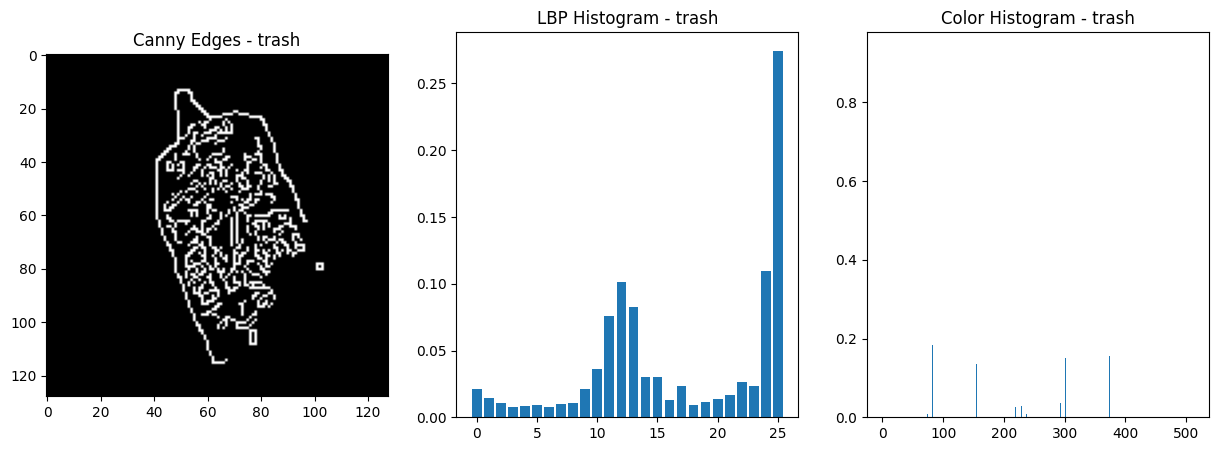

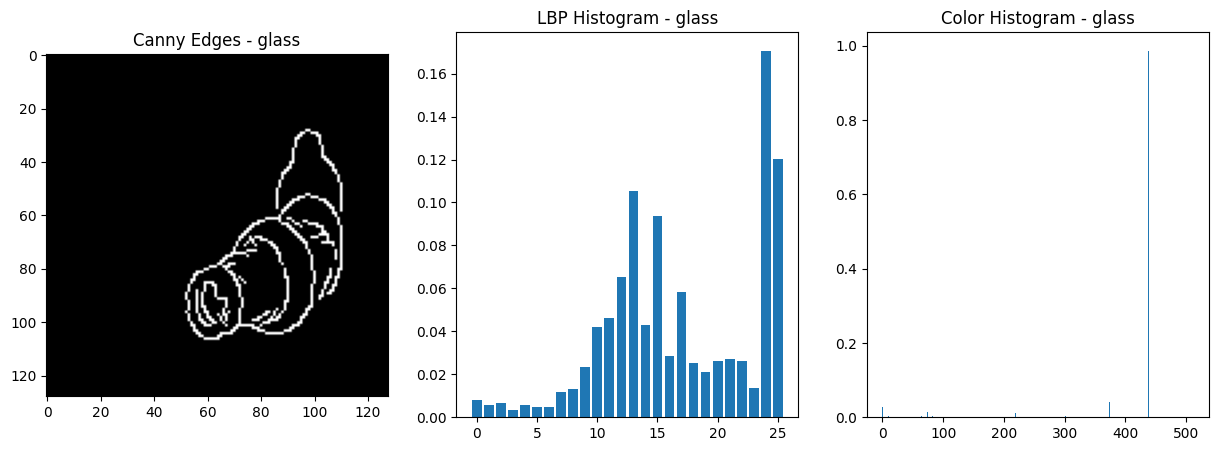

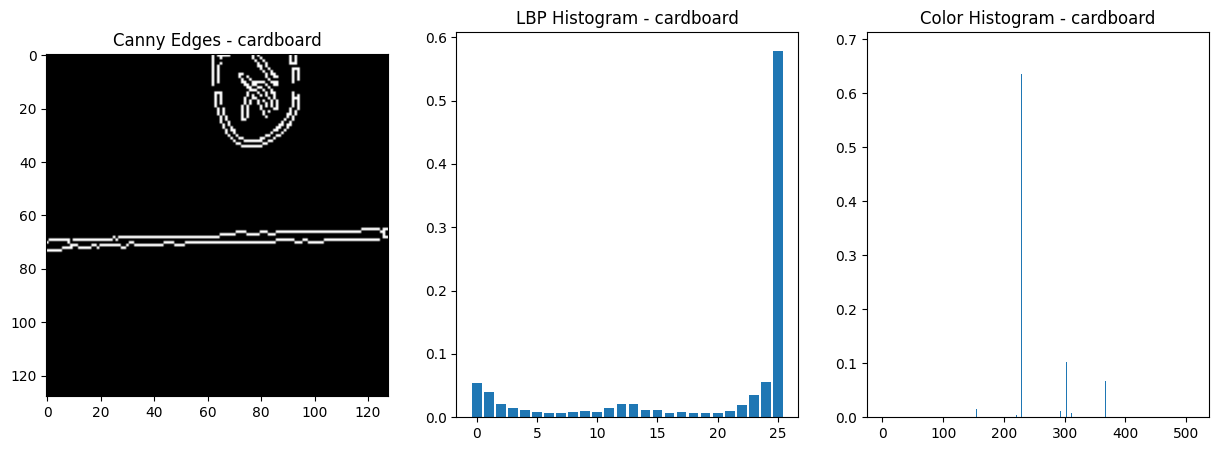

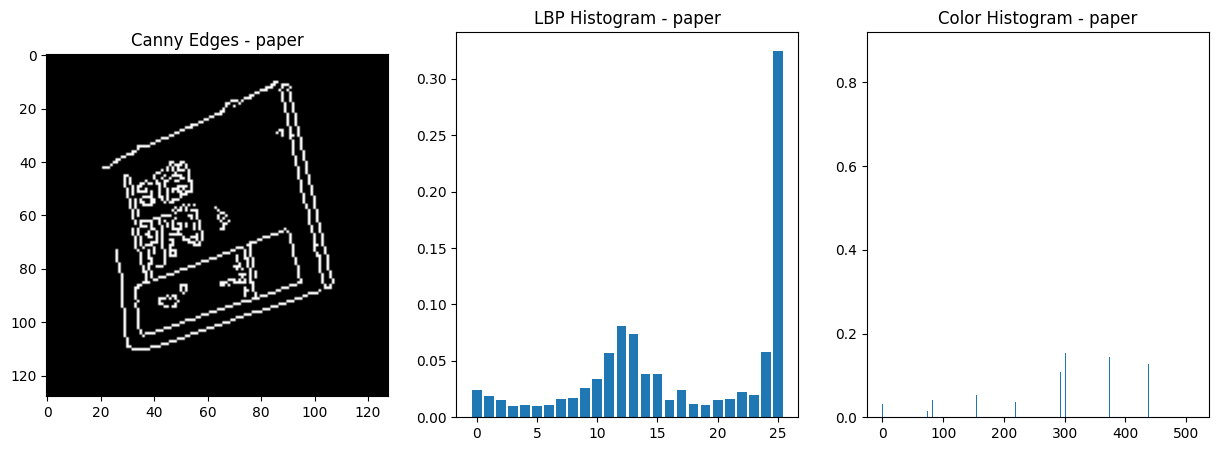

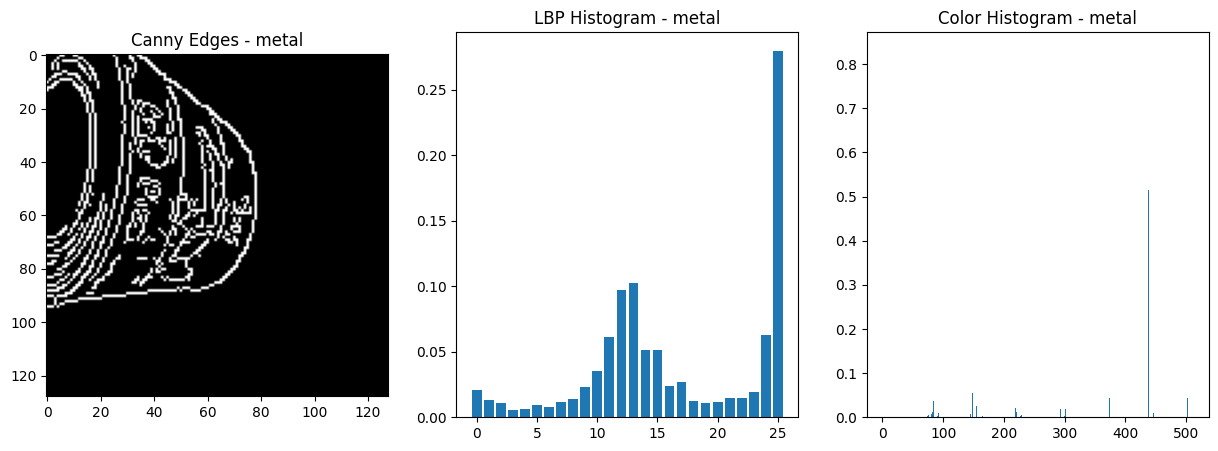

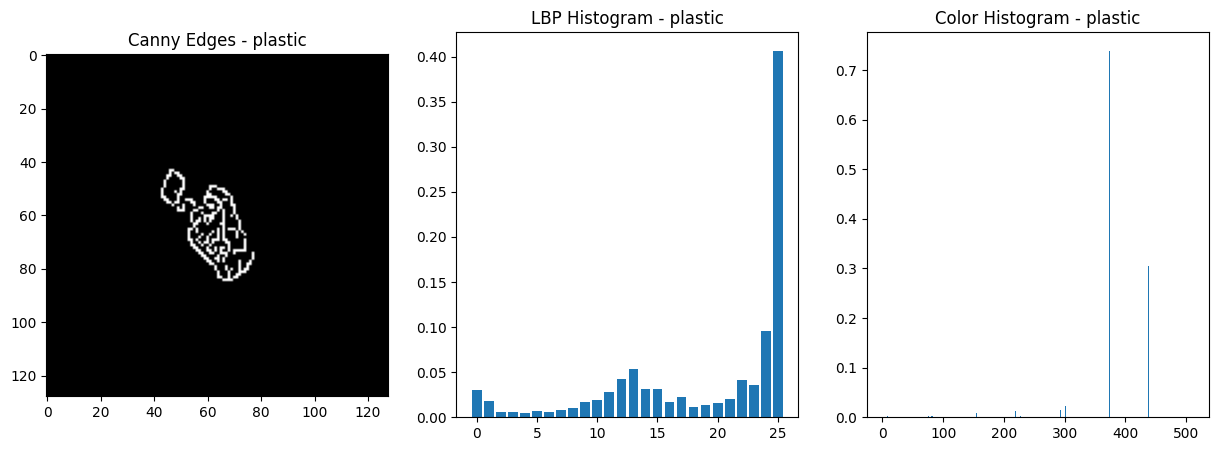

In [9]:
import cv2
import numpy as np
from skimage import feature
import matplotlib.pyplot as plt
from imutils import paths

def extract_features(image_path):
    # Read the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image at path {image_path} could not be loaded. Check the file path and ensure the file is accessible and not corrupted.")

    # Convert to grayscale
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Resize image to ensure consistency
    gray_image = cv2.resize(gray_image, (128, 128))

    # 1. Edge Detection using the Canny edge detector
    edges = cv2.Canny(gray_image, threshold1=100, threshold2=200)

    # 2. Texture Features using Local Binary Patterns
    radius = 3
    n_points = 8 * radius
    lbp = feature.local_binary_pattern(gray_image, n_points, radius, method="uniform")
    (lbp_hist, _) = np.histogram(lbp.ravel(), bins=np.arange(0, n_points + 3), range=(0, n_points + 2))

    # Normalize the histogram
    lbp_hist = lbp_hist.astype("float")
    lbp_hist /= (lbp_hist.sum() + 1e-6)

    # 3. Color Histograms
    # Assuming you may want color histograms, we need to read the image in color mode and resize it
    color_image = cv2.imread(image_path)
    color_image = cv2.resize(color_image, (128, 128))
    color_hist = cv2.calcHist([color_image], [0, 1, 2], None, [8, 8, 8], [0, 256, 0, 256, 0, 256])
    color_hist = cv2.normalize(color_hist, color_hist).flatten()

    return edges, lbp_hist, color_hist

# Example usage
image_paths = list(paths.list_images("/content/drive/Shareddrives/DATA 245 - ML/dataset-resized"))

# Dictionary to keep track of categories and their corresponding images
category_images = {}

# Iterate through the image paths, extracting and plotting features for each image
for image_path in image_paths:
    try:
        # Extract features
        edges, lbp_hist, color_hist = extract_features(image_path)

        # Get the category from the image path
        category = image_path.split("/")[-2]  # Assuming the category is the second-to-last directory in the path

        # Check if category already has an image, if not, add it
        if category not in category_images:
            category_images[category] = (edges, lbp_hist, color_hist)

    except Exception as e:
        print(f"Error processing image {image_path}: {str(e)}")

# Plot one image for each category
for category, (edges, lbp_hist, color_hist) in category_images.items():
    fig, ax = plt.subplots(1, 3, figsize=(15, 5))
    ax[0].imshow(edges, cmap='gray')
    ax[0].set_title(f'Canny Edges - {category}')
    ax[1].bar(range(len(lbp_hist)), lbp_hist)
    ax[1].set_title(f'LBP Histogram - {category}')
    ax[2].bar(range(len(color_hist)), color_hist)
    ax[2].set_title(f'Color Histogram - {category}')
    plt.show()

In [10]:
#PCA

In [13]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [16]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# Perform PCA
pca = PCA(n_components=0.95, random_state=42)  # Keep 95% of the variance
x_train_pca = pca.fit_transform(x_train)
x_test_pca = pca.transform(x_test)

# Train Random Forest classifier on PCA-transformed data
rf_classifier_pca = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier_pca.fit(x_train_pca, y_train)

# Predict on test set
y_pred_pca = rf_classifier_pca.predict(x_test_pca)

# Evaluate the model
print("Classification Report with PCA:")
print(classification_report(y_test, y_pred_pca))
print("Confusion Matrix with PCA:\n", confusion_matrix(y_test, y_pred_pca))

Classification Report with PCA:
              precision    recall  f1-score   support

           0       0.50      0.54      0.52        71
           1       0.53      0.33      0.40        89
           2       0.68      0.62      0.65       127
           3       0.53      0.64      0.58        94
           4       1.00      0.07      0.13        29
           5       0.46      0.69      0.55        96

    accuracy                           0.54       506
   macro avg       0.62      0.48      0.47       506
weighted avg       0.58      0.54      0.53       506

Confusion Matrix with PCA:
 [[38  7  8  7  0 11]
 [10 29 12 15  0 23]
 [11 12 79 13  0 12]
 [ 9  2  5 60  0 18]
 [ 4  2  5  3  2 13]
 [ 4  3  7 16  0 66]]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from tqdm import tqdm
import os

def load_images_from_folder(folder, size=(128, 128)):
    images = []
    labels = []
    for filename in tqdm(os.listdir(folder)):
        img = cv2.imread(os.path.join(folder, filename))
        if img is not None:
            img = cv2.resize(img, size)
            gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
            images.append(gray_img.flatten())
            label = filename.split('_')[0]  # Assuming labels are part of the filename before an underscore
            labels.append(label)
    return np.array(images), np.array(labels)

# Update the folder path
folder_path = '/content/drive/MyDrive/dataset-resized'
images, labels = load_images_from_folder(folder_path)

100%|██████████| 7/7 [00:00<00:00, 16.28it/s]


In [18]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42, stratify=y)

rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train, y_train)

y_pred = rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78        81
           1       0.64      0.54      0.58        82
           2       0.70      0.83      0.76       119
           3       0.70      0.59      0.64        97
           4       0.65      0.41      0.50        27
           5       0.56      0.64      0.60       100

    accuracy                           0.67       506
   macro avg       0.67      0.63      0.64       506
weighted avg       0.67      0.67      0.67       506

Confusion Matrix:
 [[64  1 11  1  1  3]
 [ 3 44 10  7  1 17]
 [ 5  5 99  2  2  6]
 [ 4  7 12 57  1 16]
 [ 1  4  2  1 11  8]
 [ 6  8  7 14  1 64]]


In [19]:
# grid search

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid to search
param_grid = {
    'n_estimators': [50, 100, 150],  # Number of trees in the forest
    'max_depth': [None, 10, 20],  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split a node
    'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required at each leaf node
}

# Initialize the Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)

# Perform grid search to find the best parameters
grid_search.fit(x_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best estimator
best_rf_classifier = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_rf_classifier.predict(x_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Fitting 5 folds for each of 81 candidates, totalling 405 fits


In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Dummy Categories for example
Categories = ['cardboard', 'metal', 'paper', 'plastic', 'trash', 'glass']

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Assuming 'x_test' is stored in the form of (num_samples, 150, 150, 3) as numpy array or needs conversion
# Check if x_test is a DataFrame and convert it to numpy array if so
if isinstance(x_test, pd.DataFrame):
    x_test = x_test.to_numpy().reshape(-1, 150, 150, 3)

# Determine the number of images to display (minimum between 5 and the length of x_test)
num_images = min(5, len(x_test))

# Create subplots
fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))

# If there's only one image to display, wrap axes in a list
if num_images == 1:
    axes = [axes]

# Display each image along with the true and predicted labels
for i, ax in enumerate(axes):
    # Reshape image data correctly depending on its original shape
    image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data.astype(np.uint8))  # Ensure the correct data type for display
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()


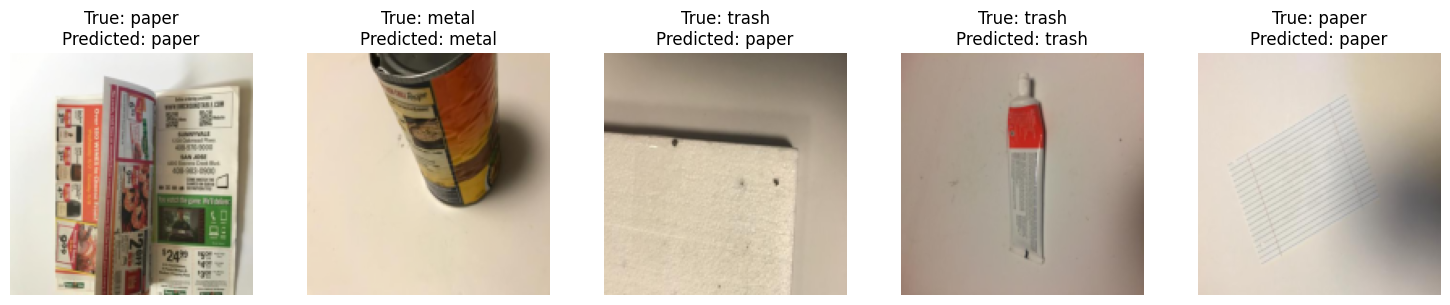

In [ ]:
import matplotlib.pyplot as plt

# Check if y_test and y_pred are pandas Series and convert them to numpy arrays if needed
if isinstance(y_test, pd.Series):
    y_test = y_test.to_numpy()
if isinstance(y_pred, pd.Series):
    y_pred = y_pred.to_numpy()

# Assuming 'x_test' has been reshaped or stored in the form of (num_samples, 150, 150, 3)
# Also assuming 'x_test' is a numpy array or a pandas DataFrame converted to numpy array

# Determine the number of images to display (min between 5 and the length of x_test)
num_images = min(5, len(x_test))

fig, axes = plt.subplots(nrows=1, ncols=num_images, figsize=(15, 3))
for i in range(num_images):
    ax = axes[i] if num_images > 1 else axes
    # If x_test is a DataFrame, convert to numpy array and reshape
    if isinstance(x_test, pd.DataFrame):
        image_data = x_test.iloc[i].to_numpy().reshape(150, 150, 3)
    else:  # If x_test is a numpy array, just reshape
        image_data = x_test[i].reshape(150, 150, 3)

    ax.imshow(image_data)
    true_label = Categories[y_test[i]]
    predicted_label = Categories[y_pred[i]]
    ax.set_title(f"True: {true_label}\nPredicted: {predicted_label}")
    ax.axis('off')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import cv2
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

def load_images_from_folder(folder):
    images = []
    labels = []
    for label in os.listdir(folder):
        label_folder = os.path.join(folder, label)
        if os.path.isdir(label_folder):
            for filename in os.listdir(label_folder):
                img_path = os.path.join(label_folder, filename)
                img = cv2.imread(img_path, cv2.IMREAD_COLOR)
                if img is not None:
                    img = cv2.resize(img, (150, 150))
                    images.append(img.flatten())
                    labels.append(label)
                else:
                    print(f"Warning: {img_path} could not be read and is skipped.")
    return np.array(images), labels

# Load images and labels
folder_path = '/content/drive/MyDrive/dataset-resized'
images, labels = load_images_from_folder(folder_path)

if images.size > 0:
    print("Images loaded successfully.")
else:
    print("No images were loaded. Check your folder path and image files.")

# Encode labels
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)

# Split the data into training and testing sets
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)

# Standardize the features
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

# Perform PCA
pca = PCA(n_components=0.95, random_state=42)
x_train_pca = pca.fit_transform(x_train_scaled)
x_test_pca = pca.transform(x_test_scaled)

# Train Random Forest classifier on PCA-transformed data
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(x_train_pca, y_train)

# Predict on test set
y_pred = rf_classifier.predict(x_test_pca)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))


Images loaded successfully.
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.12      0.21        33
           1       0.55      0.35      0.43        82
           2       0.63      0.82      0.71       119
           3       0.57      0.79      0.66        97
           4       0.64      0.26      0.37        27

    accuracy                           0.60       358
   macro avg       0.64      0.47      0.48       358
weighted avg       0.61      0.60      0.56       358

Confusion Matrix:
 [[ 4  8 10 11  0]
 [ 0 29 22 29  2]
 [ 0 10 97 11  1]
 [ 1  3 15 77  1]
 [ 0  3  9  8  7]]


In [ ]:
def plot_pca_variance(pca):
    plt.figure(figsize=(8, 6))
    plt.bar(range(1, len(pca.explained_variance_ratio_) + 1), pca.explained_variance_ratio_, alpha=0.5, align='center',
            label='Individual explained variance')
    plt.step(range(1, len(pca.explained_variance_ratio_) + 1), np.cumsum(pca.explained_variance_ratio_),
             where='mid', label='Cumulative explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal component index')
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

# Use this function after fitting PCA
# plot_pca_variance(pca)  # Uncomment this line after defining and fitting your PCA


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    cm = confusion_matrix(y_true, y_pred)
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()

# Example usage
# plot_confusion_matrix(y_test, y_pred, classes=label_encoder.classes_)


In [ ]:
from sklearn.metrics import roc_curve, auc

def plot_roc_curve(y_true, y_scores, title='ROC Curve'):
    fpr, tpr, thresholds = roc_curve(y_true, y_scores[:, 1])
    roc_auc = auc(fpr, tpr)

    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(title)
    plt.legend(loc="lower right")
    plt.show()

# Use the function assuming you have y_test and the prediction probabilities y_scores
# y_scores = best_rf_classifier.predict_proba(x_test)
# plot_roc_curve(y_test, y_scores)


In [ ]:
print("Number of features in the model:", len(best_rf_classifier.feature_importances_))

Number of features in the model: 67500


In [ ]:
# Example: If your model uses 10 features, specify all 10 feature names
feature_names = ['feature1', 'feature2', 'feature3', ..., 'feature10']


In [ ]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier
from sklearn.metrics import accuracy_score, balanced_accuracy_score, f1_score, precision_score, recall_score, jaccard_score, average_precision_score, brier_score_loss, log_loss, roc_auc_score

# Initialize and train the Bagging Classifier
bagging_clf = BaggingClassifier(n_estimators=50, random_state=42)
bagging_clf.fit(x_train, y_train)

# Initialize and train the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=50, random_state=42)
rf_clf.fit(x_train, y_train)

# Predictions for Bagging Classifier
y_pred_bagging = bagging_clf.predict(x_test)
y_probs_bagging = bagging_clf.predict_proba(x_test)

# Predictions for Random Forest Classifier
y_pred_rf = rf_clf.predict(x_test)
y_probs_rf = rf_clf.predict_proba(x_test)

# Calculate metrics for Bagging Classifier
print('Bagging Classifier Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_bagging))
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred_bagging))
print('F1 Score (Macro):', f1_score(y_test, y_pred_bagging, average='macro'))
print('F1 Score (Micro):', f1_score(y_test, y_pred_bagging, average='micro'))
print('F1 Score (Weighted):', f1_score(y_test, y_pred_bagging, average='weighted'))
print('Precision (Macro):', precision_score(y_test, y_pred_bagging, average='macro'))
print('Recall (Macro):', recall_score(y_test, y_pred_bagging, average='macro'))
print('Jaccard Score (Macro):', jaccard_score(y_test, y_pred_bagging, average='macro'))
print('Average Precision:', average_precision_score(y_test, y_probs_bagging[:, 1]))
print('Negative Brier Score:', brier_score_loss(y_test, y_probs_bagging[:, 1]))
print('Negative Log Loss:', log_loss(y_test, y_probs_bagging))
print('ROC AUC Score:', roc_auc_score(y_test, y_probs_bagging[:, 1]))

# Calculate metrics for Random Forest Classifier
print('\nRandom Forest Classifier Metrics:')
print('Accuracy:', accuracy_score(y_test, y_pred_rf))
print('Balanced Accuracy:', balanced_accuracy_score(y_test, y_pred_rf))
print('F1 Score (Macro):', f1_score(y_test, y_pred_rf, average='macro'))
print('F1 Score (Micro):', f1_score(y_test, y_pred_rf, average='micro'))
print('F1 Score (Weighted):', f1_score(y_test, y_pred_rf, average='weighted'))
print('Precision (Macro):', precision_score(y_test, y_pred_rf, average='macro'))
print('Recall (Macro):', recall_score(y_test, y_pred_rf, average='macro'))
print('Jaccard Score (Macro):', jaccard_score(y_test, y_pred_rf, average='macro'))
print('Average Precision:', average_precision_score(y_test, y_probs_rf[:, 1]))
print('Negative Brier Score:', brier_score_loss(y_test, y_probs_rf[:, 1]))
print('Negative Log Loss:', log_loss(y_test, y_probs_rf))
print('ROC AUC Score:', roc_auc_score(y_test, y_probs_rf[:, 1]))


accuracy: 0.9320
balanced_accuracy: 0.9325
f1: 0.9270
f1_micro: 0.9320
f1_macro: 0.9317
f1_weighted: 0.9321
precision_macro: 0.9311
recall_macro: 0.9325
jaccard_macro: 0.8721
average_precision: 0.9608
neg_brier_score: 0.0626
neg_log_loss: 0.2304
roc_auc: 0.9666


In [ ]:
Pkl_Filename = "Pickle_RF_Model.pkl"

with open(Pkl_Filename, 'wb') as file:
    pickle.dump(rf_model, file)